# Fianl Report #

# The result table is shown at the bottom of the notebook #

In [1]:
!pip install lxml
!pip install beautifulsoup4
!pip install html5lib
!pip install requests
!pip install geopy
!pip install geocoder

In [2]:
from bs4 import BeautifulSoup
import requests
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print("Libraries imported.")

Libraries imported.


In [3]:
source=requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup=BeautifulSoup(source,'lxml')

In [4]:
soup.prettify()

'<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <title>\n   List of postal codes of Canada: M - Wikipedia\n  </title>\n  <script>\n   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"XoFXSwpAEJsAAFgcrfcAAACV","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":948084252,"wgRevisionId":948084252,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Communications in Ontario","Postal codes in Canada","Toronto"

In [5]:
table=soup.find('table',class_='wikitable')


In [6]:
import pandas as pd

In [7]:
d0,d1,d2=[],[],[]
tr=table.find_all('tr')
for i in range(1,181):
    td=tr[i].find_all('td')
    d0+=[td[0].text[:-1]]
    d1+=[td[1].text[:-1]]
    d2+=[td[2].text[:-1].replace('/',',')]
data={'Postal code':d0,'Borough':d1,'Neighborhood':d2}


In [8]:
df=pd.DataFrame(data=data)

In [9]:
df.head(10)

,Postal code,Borough,Neighborhood
0,M1A,Not assigned,
1,M2A,Not assigned,
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park , Harbourfront"
5,M6A,North York,"Lawrence Manor , Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government"
7,M8A,Not assigned,
8,M9A,Etobicoke,Islington Avenue
9,M1B,Scarborough,"Malvern , Rouge"


In [10]:
df.drop(df[df['Borough']=='Not assigned'].index,inplace=True)

In [11]:
location=pd.read_csv('http://cocl.us/Geospatial_data')

In [12]:
location

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [13]:
df.sort_values('Postal code',inplace=True)
df

,Postal code,Borough,Neighborhood
9,M1B,Scarborough,"Malvern , Rouge"
18,M1C,Scarborough,"Rouge Hill , Port Union , Highland Creek"
27,M1E,Scarborough,"Guildwood , Morningside , West Hill"
36,M1G,Scarborough,Woburn
45,M1H,Scarborough,Cedarbrae
54,M1J,Scarborough,Scarborough Village
63,M1K,Scarborough,"Kennedy Park , Ionview , East Birchmount Park"
72,M1L,Scarborough,"Golden Mile , Clairlea , Oakridge"
81,M1M,Scarborough,"Cliffside , Cliffcrest , Scarborough Village West"
90,M1N,Scarborough,"Birch Cliff , Cliffside West"


In [14]:
location.rename(columns={'Postal Code':'Postal code'},inplace=True)

In [15]:
df=pd.merge(df,location,on='Postal code')
df

,Postal code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern , Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill , Port Union , Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood , Morningside , West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"Kennedy Park , Ionview , East Birchmount Park",43.727929,-79.262029
7,M1L,Scarborough,"Golden Mile , Clairlea , Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffside , Cliffcrest , Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff , Cliffside West",43.692657,-79.264848


In [16]:
# Toronto's latitude and longitude
latitude=43.6534817
longitude=-79.3839347

# Create map of Toronto #

In [17]:
from IPython.display import HTML

In [18]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'],df['Borough'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto 

# Use Foursquares explore the neighborhoods

#### Define Foursquare Credentials and Version

In [19]:
CLIENT_ID = 'E5J2LKGOAGILWJYNZMRPSSQOGRYF53CB4JIOUGCHYBDE4ZES' # your Foursquare ID
CLIENT_SECRET = 'C3BFHZ51SUFU02G44XX1NJU43Y0ZSZYG5EEMLN33XKCX0SEI' # your Foursquare Secret
VERSION = '20200404' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: E5J2LKGOAGILWJYNZMRPSSQOGRYF53CB4JIOUGCHYBDE4ZES
CLIENT_SECRET:C3BFHZ51SUFU02G44XX1NJU43Y0ZSZYG5EEMLN33XKCX0SEI


### get top 100 venues with a radius of 2000 meter

In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *toronto_venues*.

In [21]:
LIMIT=100
toronto_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Malvern , Rouge
Rouge Hill , Port Union , Highland Creek
Guildwood , Morningside , West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park , Ionview , East Birchmount Park
Golden Mile , Clairlea , Oakridge
Cliffside , Cliffcrest , Scarborough Village West
Birch Cliff , Cliffside West
Dorset Park , Wexford Heights , Scarborough Town Centre
Wexford , Maryvale
Agincourt
Clarks Corners , Tam O'Shanter , Sullivan
Milliken , Agincourt North , Steeles East , L'Amoreaux East
Steeles West , L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview , Henry Farm , Oriole
Bayview Village
York Mills , Silver Hills
Willowdale , Newtonbrook
Willowdale
York Mills West
Willowdale
Parkwoods
Don Mills
Don Mills
Bathurst Manor , Wilson Heights , Downsview North
Northwood Park , York University
Downsview
Downsview
Downsview
Downsview
Victoria Village
Parkview Hill , Woodbine Gardens
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West , Riverdale
India Bazaar , The Beaches 

In [22]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Malvern , Rouge",43.806686,-79.194353,African Rainforest Pavilion,43.817725,-79.183433,Zoo Exhibit
1,"Malvern , Rouge",43.806686,-79.194353,Toronto Pan Am Sports Centre,43.790623,-79.193869,Athletics & Sports
2,"Malvern , Rouge",43.806686,-79.194353,Toronto Zoo,43.820582,-79.181551,Zoo
3,"Malvern , Rouge",43.806686,-79.194353,Polar Bear Exhibit,43.823372,-79.185145,Zoo
4,"Malvern , Rouge",43.806686,-79.194353,Australasia Pavillion,43.822563,-79.183286,Zoo Exhibit


### check Venue Category

In [23]:
toronto_venues.groupby(['Venue Category']).count()
# We can find that there are 53 Shopping Malls in Toronto

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Accessories Store,1,1,1,1,1,1
Afghan Restaurant,5,5,5,5,5,5
African Restaurant,1,1,1,1,1,1
Airport,2,2,2,2,2,2
Airport Lounge,1,1,1,1,1,1
American Restaurant,78,78,78,78,78,78
Amphitheater,4,4,4,4,4,4
Animal Shelter,1,1,1,1,1,1
Antique Shop,8,8,8,8,8,8


##### Let's find out how many unique categories can be curated from all the returned venues

In [24]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 338 uniques categories.


In [25]:
# check if the results contain "Shopping Mall"
"Shopping Mall" in toronto_venues['Venue Category'].unique()

True

## Analyze Each Neighbourhood

In [26]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Zoo Exhibit,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Castle,Caucasian Restaurant,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Quad,College Rec Center,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hakka Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Leather Goods Store,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Medical Supply Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Nudist Beach,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pide Place,Pie Shop,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Racecourse,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Ski Chalet,Smoke Shop,Sna

### group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [27]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Zoo Exhibit,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Castle,Caucasian Restaurant,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Quad,College Rec Center,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hakka Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Leather Goods Store,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Medical Supply Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Nudist Beach,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pide Place,Pie Shop,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Racecourse,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Ski Chalet,Smoke Shop,Sna

In [28]:
len(toronto_grouped[toronto_grouped["Shopping Mall"] > 0])

46

#### Create a New DataFrame containing Shopping Mall

In [29]:
toronto_mall = toronto_grouped[["Neighborhood","Shopping Mall"]]
toronto_mall

,Neighborhood,Shopping Mall
0,Agincourt,0.020000
1,"Alderwood , Long Branch",0.010000
2,"Bathurst Manor , Wilson Heights , Downsview North",0.017241
3,Bayview Village,0.040816
4,"Bedford Park , Lawrence Manor East",0.000000
5,Berczy Park,0.000000
6,"Birch Cliff , Cliffside West",0.000000
7,"Brockton , Parkdale Village , Exhibition Place",0.000000
8,Business reply mail Processing CentrE,0.000000
9,"CN Tower , King and Spadina , Railway Lands , ...",0.000000


# Cluster Neighborhoods

## Run k-means to cluster the neighborhoods

In [30]:
from scipy.spatial.distance import cdist
%matplotlib inline
import matplotlib.pyplot as plt

### use elbow rule to get the best K of clusters

Text(0.5, 1.0, 'find elbow point')

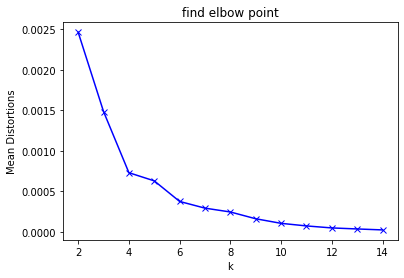

In [31]:
# set number of clusters
meandistortions=[]
toronto_clustering = toronto_mall.drop(["Neighborhood"], 1)
for kclusters in range(2,15):
   
    # run k-means clustering
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_clustering)
    meandistortions.append(sum(np.min(
            cdist(toronto_clustering,kmeans.cluster_centers_,
                 'euclidean'),axis=1))/toronto_clustering.shape[0])

plt.plot(range(2,15),meandistortions,'bx-')
plt.xlabel('k')
plt.ylabel('Mean Distortions')
plt.title(u'find elbow point')
    
    


In [32]:
# The best k is 4
kmeans = KMeans(n_clusters=4, random_state=0).fit(toronto_clustering)
kmeans.labels_[:10]

array([3, 1, 3, 2, 0, 0, 0, 0, 0, 0])

In [33]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
toronto_merged = toronto_mall.copy()

# add clustering labels
toronto_merged["Cluster Labels"] = kmeans.labels_
toronto_merged.head()

,Neighborhood,Shopping Mall,Cluster Labels
0,Agincourt,0.020000,3
1,"Alderwood , Long Branch",0.010000,1
2,"Bathurst Manor , Wilson Heights , Downsview North",0.017241,3
3,Bayview Village,0.040816,2
4,"Bedford Park , Lawrence Manor East",0.000000,0


In [34]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(df.set_index("Neighborhood"), on="Neighborhood")

print(toronto_merged.shape)
toronto_merged.head() 

(103, 7)


,Neighborhood,Shopping Mall,Cluster Labels,Postal code,Borough,Latitude,Longitude
0,Agincourt,0.020000,3,M1S,Scarborough,43.794200,-79.262029
1,"Alderwood , Long Branch",0.010000,1,M8W,Etobicoke,43.602414,-79.543484
2,"Bathurst Manor , Wilson Heights , Downsview North",0.017241,3,M3H,North York,43.754328,-79.442259
3,Bayview Village,0.040816,2,M2K,North York,43.786947,-79.385975
4,"Bedford Park , Lawrence Manor East",0.000000,0,M5M,North York,43.733283,-79.419750


### Finally, visualize the resulting clusters

In [35]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [36]:
# save the map as HTML file
map_clusters.save('map_clusters.html')

## Examine Clusters

Cluster 0

In [40]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0]

,Neighborhood,Shopping Mall,Cluster Labels,Postal code,Borough,Latitude,Longitude
4,"Bedford Park , Lawrence Manor East",0.000000,0,M5M,North York,43.733283,-79.419750
5,Berczy Park,0.000000,0,M5E,Downtown Toronto,43.644771,-79.373306
6,"Birch Cliff , Cliffside West",0.000000,0,M1N,Scarborough,43.692657,-79.264848
7,"Brockton , Parkdale Village , Exhibition Place",0.000000,0,M6K,West Toronto,43.636847,-79.428191
8,Business reply mail Processing CentrE,0.000000,0,M7Y,East Toronto,43.662744,-79.321558
9,"CN Tower , King and Spadina , Railway Lands , ...",0.000000,0,M5V,Downtown Toronto,43.628947,-79.394420
10,Caledonia-Fairbanks,0.000000,0,M6E,York,43.689026,-79.453512
14,Christie,0.000000,0,M6G,Downtown Toronto,43.669542,-79.422564
17,"Cliffside , Cliffcrest , Scarborough Village West",0.000000,0,M1M,Scarborough,43.716316,-79.239476
19,Davisville,0.000000,0,M4S,Central Toronto,43.704324,-79.388790


Cluster 1

In [41]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1]

,Neighborhood,Shopping Mall,Cluster Labels,Postal code,Borough,Latitude,Longitude
1,"Alderwood , Long Branch",0.010000,1,M8W,Etobicoke,43.602414,-79.543484
11,Canada Post Gateway Processing Centre,0.010000,1,M7R,Mississauga,43.636966,-79.615819
12,Cedarbrae,0.010000,1,M1H,Scarborough,43.773136,-79.239476
13,Central Bay Street,0.010000,1,M5G,Downtown Toronto,43.657952,-79.387383
16,"Clarks Corners , Tam O'Shanter , Sullivan",0.011765,1,M1T,Scarborough,43.781638,-79.304302
18,"Commerce Court , Victoria Hotel",0.010000,1,M5L,Downtown Toronto,43.648198,-79.379817
21,"Del Ray , Mount Dennis , Keelsdale and Silvert...",0.013889,1,M6M,York,43.691116,-79.476013
22,Don Mills,0.010256,1,M3B,North York,43.745906,-79.352188
22,Don Mills,0.010256,1,M3C,North York,43.725900,-79.340923
23,"Dorset Park , Wexford Heights , Scarborough To...",0.010638,1,M1P,Scarborough,43.757410,-79.273304


Cluster 2

In [42]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2]

,Neighborhood,Shopping Mall,Cluster Labels,Postal code,Borough,Latitude,Longitude
3,Bayview Village,0.040816,2,M2K,North York,43.786947,-79.385975
38,Humber Summit,0.032258,2,M9L,North York,43.756303,-79.565963
42,Islington Avenue,0.045455,2,M9A,Etobicoke,43.667856,-79.532242


Cluster 3

In [44]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3]

,Neighborhood,Shopping Mall,Cluster Labels,Postal code,Borough,Latitude,Longitude
0,Agincourt,0.020000,3,M1S,Scarborough,43.794200,-79.262029
2,"Bathurst Manor , Wilson Heights , Downsview North",0.017241,3,M3H,North York,43.754328,-79.442259
15,Church and Wellesley,0.020000,3,M4Y,Downtown Toronto,43.665860,-79.383160
39,"Humberlea , Emery",0.022222,3,M9M,North York,43.724766,-79.532242
45,"Kingsview Village , St. Phillips , Martin Grov...",0.015152,3,M9R,Etobicoke,43.688905,-79.554724
63,"Queen's Park , Ontario Provincial Government",0.020000,3,M7A,Downtown Toronto,43.662301,-79.389494
89,Westmount,0.016949,3,M9P,Etobicoke,43.696319,-79.532242
90,Weston,0.015385,3,M9N,York,43.706876,-79.518188
92,Willowdale,0.020833,3,M2N,North York,43.770120,-79.408493
92,Willowdale,0.020833,3,M2R,North York,43.782736,-79.442259
